In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("NYPD_Complaint_Data_Historic.tsv", sep="\t", usecols=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'PREM_TYP_DESC'])

In [3]:
dt = pd.to_datetime(df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM'])
df.index = pd.DatetimeIndex(dt)
df.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], inplace=True, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458223 entries, 2017-12-23 15:00:00 to 2017-12-23 15:00:00
Data columns (total 1 columns):
OFNS_DESC    458201 non-null object
dtypes: object(1)
memory usage: 5.2+ MB


In [4]:
loc_to_change  = list(df['OFNS_DESC'].value_counts()[25:].index)
df.loc[df['OFNS_DESC'].isin(loc_to_change) , df.columns=='OFNS_DESC'] = 'OTHER'
df['OFNS_DESC'] = pd.Categorical(df['OFNS_DESC'])

In [5]:
loc_to_change  = list(df['PREM_TYP_DESC'].value_counts()[25:].index)
df.loc[df['PREM_TYP_DESC'].isin(loc_to_change) , df.columns=='PREM_TYP_DESC'] = 'OTHER'
df['PREM_TYP_DESC'] = pd.Categorical(df['PREM_TYP_DESC'])

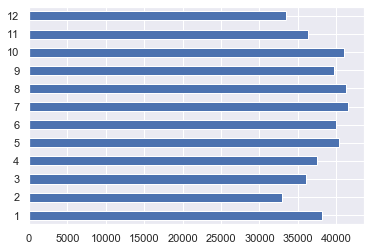

In [10]:
df.groupby(df.index.month).size().plot(kind='barh')
plt.show()

([<matplotlib.axis.YTick at 0x10885430>,
 <a list of 7 Text yticklabel objects>)

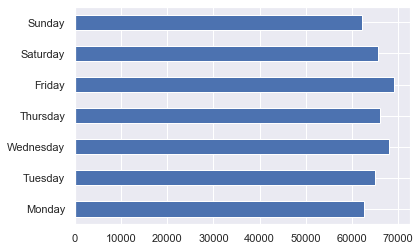

In [12]:
df.groupby(df.index.dayofweek).size().plot(kind='barh')
dayname = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(np.arange(7), dayname)
plt.show()

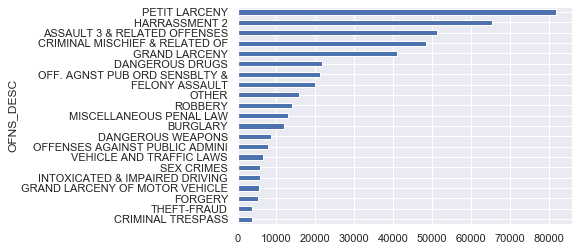

In [15]:
df.groupby(df.OFNS_DESC).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

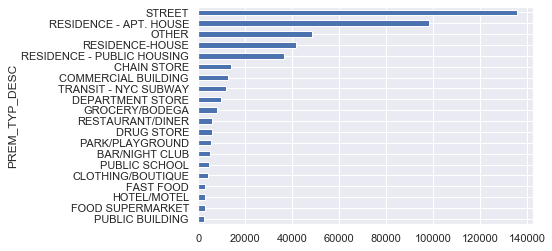

In [20]:
df.groupby(df.PREM_TYP_DESC).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [6]:
def pivot_normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

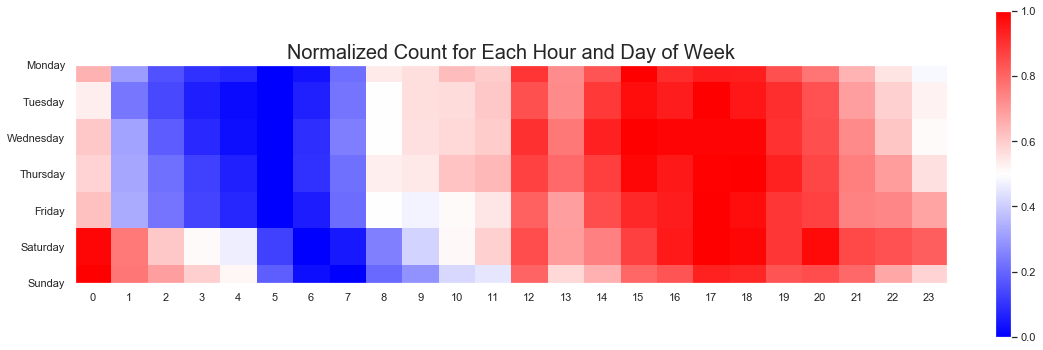

In [7]:
#pivot table to group day of week by hour
hour_by_week = df.pivot_table(index=df.index.hour, columns=df.index.dayofweek, aggfunc=np.size).fillna(0)

#normalize and plot heatmap
df2 = pivot_normalize(hour_by_week)
plt.figure(figsize=(17,6))
plt.imshow(df2.T, cmap='bwr'); plt.colorbar(fraction=0.03)
dayname = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(np.arange(7), dayname); plt.xticks(np.arange(df2.shape[0])); plt.title('Normalized Count for Each Hour and Day of Week', fontsize='20'); plt.grid(False)
plt.show()

In [39]:
hour_by_ofns = df.pivot_table(index=df.index.hour, columns=df.OFNS_DESC, aggfunc=np.size).fillna(0)

df2 = normalize(hour_by_ofns)
print (df2.columns.astype(str).tolist())

['ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'FORGERY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OTHER', 'PETIT LARCENY', 'ROBBERY', 'SEX CRIMES', 'THEFT-FRAUD', 'VEHICLE AND TRAFFIC LAWS']


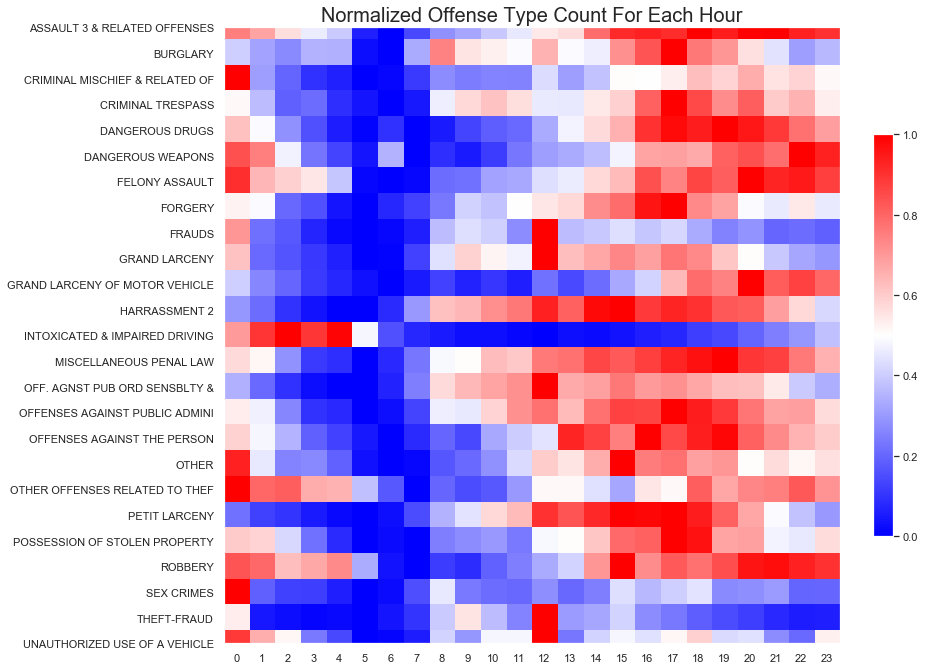

In [35]:
hour_by_ofns = df.pivot_table(index=df.index.hour, columns=df.OFNS_DESC, aggfunc=np.size).fillna(0)

df2 = pivot_normalize(hour_by_ofns)
plt.figure(figsize=(12,13))
plt.imshow(df2.T, cmap='bwr')
plt.colorbar(fraction=0.03)
plt.yticks(np.arange(25), df2.columns.astype(str).tolist())
plt.xticks(np.arange(df2.shape[0]))
plt.title('Normalized Offense Type Count For Each Hour', fontsize='20')
plt.grid(False)
plt.show()

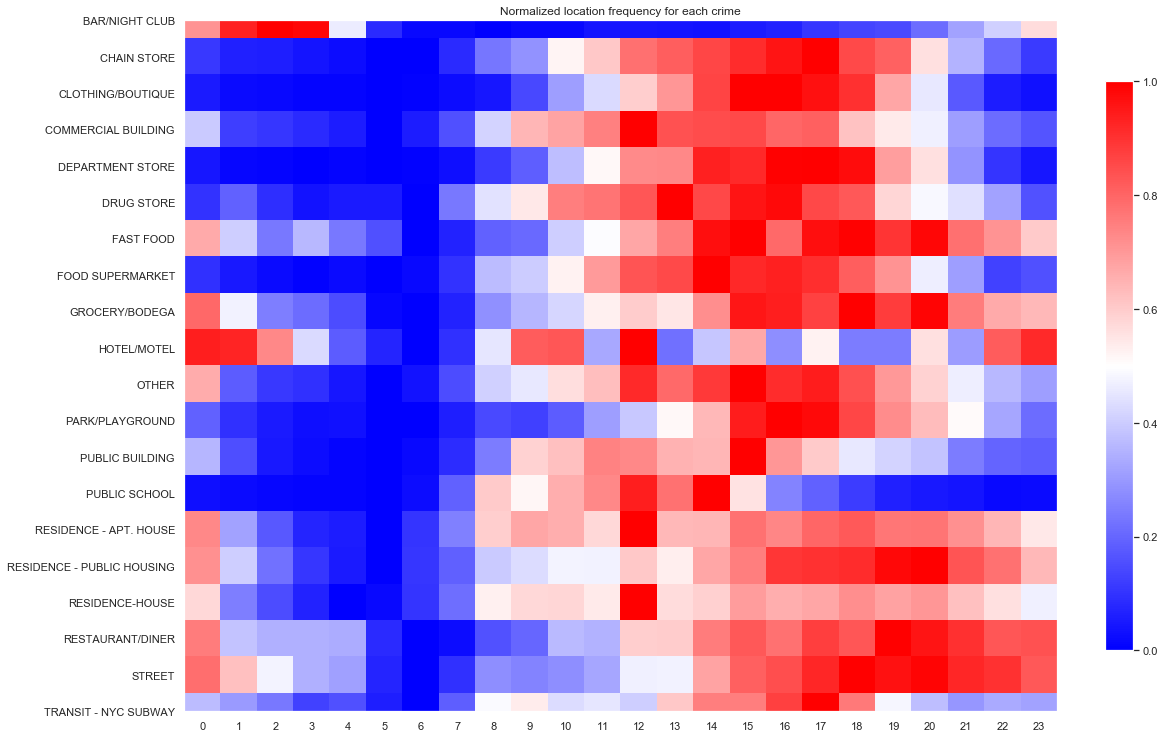

In [42]:
hour_by_prem = df.pivot_table(index=df.index.hour, columns=df.PREM_TYP_DESC, aggfunc=np.size).fillna(0)

df2 = normalize(hour_by_prem)
plt.figure(figsize=(17,13))
plt.imshow(df2.T, cmap='bwr')
plt.colorbar(fraction=0.03)
plt.yticks(np.arange(20), df2.columns.astype(str).tolist())
plt.xticks(np.arange(df2.shape[0]))
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

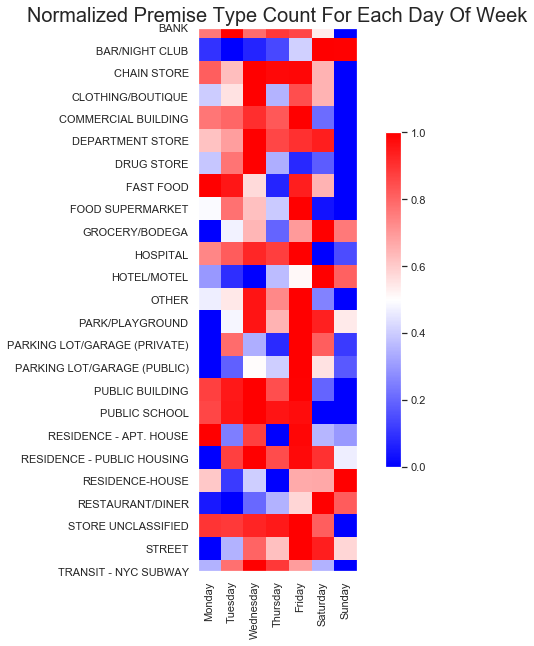

In [41]:
day_by_prem = df.pivot_table(index=df.index.dayofweek, columns=df.PREM_TYP_DESC, aggfunc=np.size).fillna(0)

df2 = normalize(day_by_prem)
plt.figure(figsize=(10,10))
plt.imshow(df2.T, cmap='bwr')
plt.colorbar(fraction=0.03)
plt.yticks(np.arange(25), df2.columns.astype(str).tolist())
dayname = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(np.arange(7), dayname, rotation='vertical')
plt.title('Normalized Premise Type Count For Each Day Of Week', fontsize='20')
plt.grid(False)
plt.show()

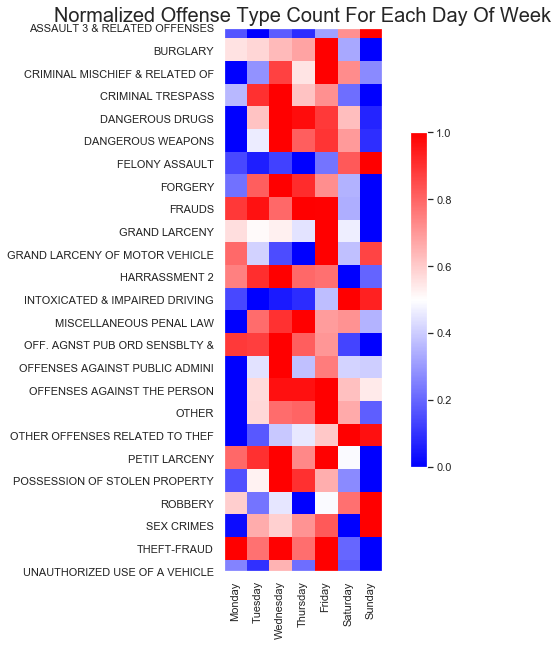

In [44]:
day_by_ofns = df.pivot_table(index=df.index.dayofweek, columns=df.OFNS_DESC, aggfunc=np.size).fillna(0)

df2 = normalize(day_by_ofns)
plt.figure(figsize=(10,10))
plt.imshow(df2.T, cmap='bwr')
plt.colorbar(fraction=0.03)
plt.yticks(np.arange(25), df2.columns.astype(str).tolist())
dayname = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(np.arange(7), dayname, rotation='vertical')
plt.title('Normalized Offense Type Count For Each Day Of Week', fontsize='20')
plt.grid(False)
plt.show()

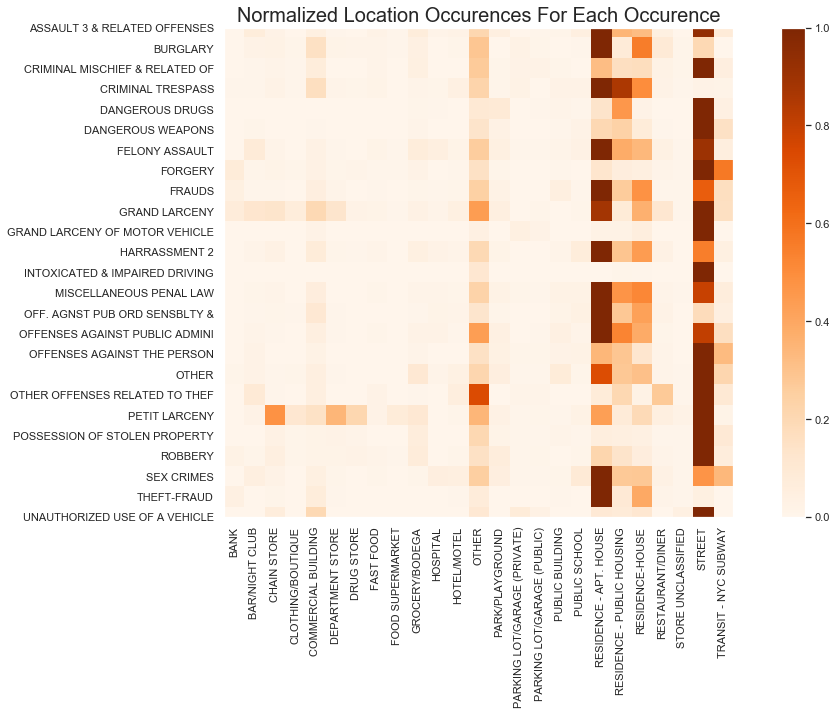

In [21]:
prem_by_ofns = df.pivot_table(index=df.PREM_TYP_DESC, columns=df.OFNS_DESC, aggfunc=np.size).fillna(0)

df2 = normalize(prem_by_ofns)
plt.figure(figsize=(17,9))
plt.imshow(df2.T, cmap='Oranges')
plt.colorbar(fraction=0.03); plt.yticks(np.arange(25), df2.columns.astype(str).tolist()); plt.xticks(np.arange(25), df2.index.astype(str).tolist(), rotation='vertical')
plt.title('Normalized Location Occurences For Each Occurence', fontsize='20'); plt.grid(False)
plt.show()